### **Bai Tap 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [52]:
# Datasets

data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)

N = data.shape[0]
X = data[:, :3]
y = data[: ,3: ]

In [53]:
# Normalize input data by using mean normalizaton
def mean_normalization(X):
   N = len(X)
   maxi = np.max(X)
   mini = np.min(X)
   avg = np.mean(X)
   X = (X - avg) / (maxi - mini)
   X_b = np.c_[np.ones((N, 1)), X]
   return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [92]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
   thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])

   theta_path = [thetas]
   losses = []

   for epoch in range(n_epochs):
      for i in range(N):
         random_idx = i
         xi = X_b[random_idx:random_idx+1]
         yi = y[random_idx:random_idx+1]

         # Compute output
         y_pred = xi @ thetas

         # Compute loss 
         li = (y_pred - yi) ** 2 / 2

         # Compute gradients 
         gradient = xi.T @ (y_pred - yi) 

         # update gradients
         thetas -= learning_rate * gradient

         theta_path.append(thetas.copy())
         losses.append(np.sum(li))
 
   return theta_path , losses



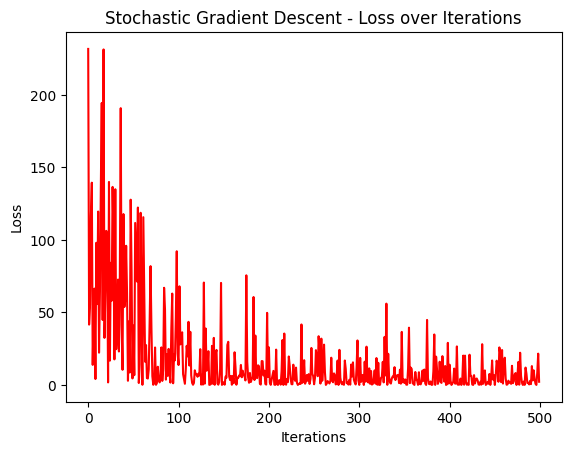

In [93]:
theta_path , losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(len(losses[:500])))
plt.plot(x_axis, losses[:500], color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent - Loss over Iterations")
plt.show()

**QUESTION 1:** 

In [94]:
theta_path , losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


**Mini_batch**

In [126]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
   thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

   theta_path = [thetas]
   losses = []

   for epoch in range(n_epochs):
      # shuffled_indices = np.random.permutation(N)
      shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155,
                                    36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152,
                                    102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196,
                                    6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151,
                                    104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94,
                                    18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93,
                                    192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130,
                                    127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9,
                                    84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60,
                                    86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52,
                                    124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74,
                                    145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91,
                                    82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129,
                                    120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119,
                                    12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7,
                                    193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                    133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166,
                                    156, 2, 134, 56, 123, 122, 154])
      
      X_b_shuffle = X_b[shuffled_indices]
      y_shuffle = y[shuffled_indices]

      for i in range(0, N, minibatch_size):
         xi = X_b_shuffle[i:i+minibatch_size]
         yi = y_shuffle[i:i+minibatch_size]


         # Compute output
         y_pred = xi @ thetas

         # Compute loss
         loss = (y_pred - yi) ** 2 

         # Compute gradients 
         gradient_loss = xi.T @ ((y_pred - yi) / minibatch_size)

         # update gradients
         thetas -= learning_rate * gradient_loss
         theta_path.append(thetas.copy())

         loss_mean = np.sum(loss) / minibatch_size
         losses.append(loss_mean)

   return theta_path, losses


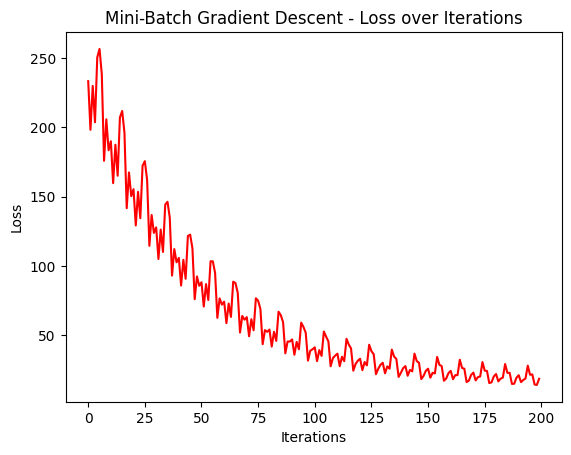

In [127]:
theta_path, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Mini-Batch Gradient Descent - Loss over Iterations")
plt.show()

**QUESTION 2**

In [128]:
theta_path, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

17731.3
